# A PROJECT ON GOOGLE TRAVEL REVIEWER SEGMENTATION USING KMEANS CLUSTERING
## data file : google_reviews.csv

                                                                                                      Rabin Regmi
                                                                                                           
                                                                                                           

### Step 1: importing libraries and dataset, exploring the dataset

In [2]:
from pyspark.sql import SparkSession

In [3]:
spark = SparkSession.builder.appName('Reviews').getOrCreate()

In [4]:
data = spark.read.csv('google_reviews.csv', inferSchema=True, header=True)

In [5]:
data.printSchema()

root
 |-- User: string (nullable = true)
 |-- Category 1: double (nullable = true)
 |-- Category 2: double (nullable = true)
 |-- Category 3: double (nullable = true)
 |-- Category 4: double (nullable = true)
 |-- Category 5: double (nullable = true)
 |-- Category 6: double (nullable = true)
 |-- Category 7: double (nullable = true)
 |-- Category 8: double (nullable = true)
 |-- Category 9: double (nullable = true)
 |-- Category 10: double (nullable = true)
 |-- Category 11: string (nullable = true)
 |-- Category 12: double (nullable = true)
 |-- Category 13: double (nullable = true)
 |-- Category 14: double (nullable = true)
 |-- Category 15: double (nullable = true)
 |-- Category 16: double (nullable = true)
 |-- Category 17: double (nullable = true)
 |-- Category 18: double (nullable = true)
 |-- Category 19: double (nullable = true)
 |-- Category 20: double (nullable = true)
 |-- Category 21: double (nullable = true)
 |-- Category 22: double (nullable = true)
 |-- Category 23: doub

In [6]:
data.show(5)

23/05/04 15:07:28 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+------+----------+----------+----------+----------+----------+----------+----------+----------+----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+----+
|  User|Category 1|Category 2|Category 3|Category 4|Category 5|Category 6|Category 7|Category 8|Category 9|Category 10|Category 11|Category 12|Category 13|Category 14|Category 15|Category 16|Category 17|Category 18|Category 19|Category 20|Category 21|Category 22|Category 23|Category 24|_c25|
+------+----------+----------+----------+----------+----------+----------+----------+----------+----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+----+
|User 1|       0.0|       0.0|      3.63|      3.65|       5.0|      2.92|       5.0|      2.35|      2.33|       2.64|  

In [7]:
data.describe().show(vertical=True)

-RECORD 0-------------------------
 summary     | count              
 User        | 5456               
 Category 1  | 5456               
 Category 2  | 5456               
 Category 3  | 5456               
 Category 4  | 5456               
 Category 5  | 5456               
 Category 6  | 5456               
 Category 7  | 5456               
 Category 8  | 5456               
 Category 9  | 5456               
 Category 10 | 5456               
 Category 11 | 5456               
 Category 12 | 5455               
 Category 13 | 5456               
 Category 14 | 5456               
 Category 15 | 5456               
 Category 16 | 5456               
 Category 17 | 5456               
 Category 18 | 5456               
 Category 19 | 5456               
 Category 20 | 5456               
 Category 21 | 5456               
 Category 22 | 5456               
 Category 23 | 5456               
 Category 24 | 5455               
 _c25        | 2                  
-RECORD 1-----------

### Step 2:  Cleaning and transforming the data

In [8]:
from pyspark.sql.functions import isnan, count, when, col

null_counts = data.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in data.columns])
zero_counts = data.select([count(when(col(c) == 0, c)).alias(c) for c in data.columns])

In [9]:
# Counting the number of records with null value and 0 in our original dataset
null_counts.show(vertical=True)
zero_counts.show(vertical=True)

-RECORD 0-----------
 User        | 0    
 Category 1  | 0    
 Category 2  | 0    
 Category 3  | 0    
 Category 4  | 0    
 Category 5  | 0    
 Category 6  | 0    
 Category 7  | 0    
 Category 8  | 0    
 Category 9  | 0    
 Category 10 | 0    
 Category 11 | 0    
 Category 12 | 1    
 Category 13 | 0    
 Category 14 | 0    
 Category 15 | 0    
 Category 16 | 0    
 Category 17 | 0    
 Category 18 | 0    
 Category 19 | 0    
 Category 20 | 0    
 Category 21 | 0    
 Category 22 | 0    
 Category 23 | 0    
 Category 24 | 1    
 _c25        | 5454 

-RECORD 0-----------
 User        | 0    
 Category 1  | 195  
 Category 2  | 90   
 Category 3  | 4    
 Category 4  | 0    
 Category 5  | 0    
 Category 6  | 0    
 Category 7  | 0    
 Category 8  | 0    
 Category 9  | 0    
 Category 10 | 0    
 Category 11 | 452  
 Category 12 | 0    
 Category 13 | 0    
 Category 14 | 0    
 Category 15 | 4    
 Category 16 | 112  
 Category 17 | 479  
 Category 18 | 1017 
 Category 19

In [13]:
new_data = data.select(
 'Category 1',
 'Category 2',
 'Category 3',
 'Category 4',
 'Category 5',
 'Category 6',
 'Category 7',
 'Category 8',
 'Category 9',
 'Category 10',
 'Category 11',
 'Category 12',
 'Category 13',
 'Category 14',
 'Category 15',
 'Category 16',
 'Category 17',
#  'Category 18', These columns are not considered as they have more than 1000 records with value zero.
#  'Category 19',
 'Category 20',
 'Category 21',
 'Category 22',
 'Category 23',
 'Category 24')

In [14]:
from pyspark.sql.functions import isnan, count, when, col

null_counts = new_data.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in new_data.columns])


In [15]:
null_counts.show(vertical=True)

-RECORD 0----------
 Category 1  | 0   
 Category 2  | 0   
 Category 3  | 0   
 Category 4  | 0   
 Category 5  | 0   
 Category 6  | 0   
 Category 7  | 0   
 Category 8  | 0   
 Category 9  | 0   
 Category 10 | 0   
 Category 11 | 0   
 Category 12 | 1   
 Category 13 | 0   
 Category 14 | 0   
 Category 15 | 0   
 Category 16 | 0   
 Category 17 | 0   
 Category 20 | 0   
 Category 21 | 0   
 Category 22 | 0   
 Category 23 | 0   
 Category 24 | 1   



In [16]:
for col in new_data.columns:
    new_data = new_data.withColumn(col, new_data[col].cast('double'))
    new_data = new_data.withColumn(col, when(isnan(new_data[col]), None).otherwise(new_data[col]))

In [17]:
from pyspark.sql.functions import isnan, count, when, col

null_counts = new_data.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in new_data.columns])

In [18]:
# Counting the number of null value after converting one record at Category 11 to null value
null_counts.show(vertical=True)

-RECORD 0----------
 Category 1  | 0   
 Category 2  | 0   
 Category 3  | 0   
 Category 4  | 0   
 Category 5  | 0   
 Category 6  | 0   
 Category 7  | 0   
 Category 8  | 0   
 Category 9  | 0   
 Category 10 | 0   
 Category 11 | 1   
 Category 12 | 1   
 Category 13 | 0   
 Category 14 | 0   
 Category 15 | 0   
 Category 16 | 0   
 Category 17 | 0   
 Category 20 | 0   
 Category 21 | 0   
 Category 22 | 0   
 Category 23 | 0   
 Category 24 | 1   



In [21]:
# Dropping null value
new_data=new_data.na.drop()

In [22]:
from pyspark.sql.functions import isnan, count, when, col

null_counts = new_data.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in new_data.columns])

In [23]:
# Final check of null value on our selected features
null_counts.show(vertical=True)

-RECORD 0----------
 Category 1  | 0   
 Category 2  | 0   
 Category 3  | 0   
 Category 4  | 0   
 Category 5  | 0   
 Category 6  | 0   
 Category 7  | 0   
 Category 8  | 0   
 Category 9  | 0   
 Category 10 | 0   
 Category 11 | 0   
 Category 12 | 0   
 Category 13 | 0   
 Category 14 | 0   
 Category 15 | 0   
 Category 16 | 0   
 Category 17 | 0   
 Category 20 | 0   
 Category 21 | 0   
 Category 22 | 0   
 Category 23 | 0   
 Category 24 | 0   



In [24]:
# final descriptive analysis of our selected features
new_data.describe().show(vertical=True)

-RECORD 0-------------------------
 summary     | count              
 Category 1  | 5454               
 Category 2  | 5454               
 Category 3  | 5454               
 Category 4  | 5454               
 Category 5  | 5454               
 Category 6  | 5454               
 Category 7  | 5454               
 Category 8  | 5454               
 Category 9  | 5454               
 Category 10 | 5454               
 Category 11 | 5454               
 Category 12 | 5454               
 Category 13 | 5454               
 Category 14 | 5454               
 Category 15 | 5454               
 Category 16 | 5454               
 Category 17 | 5454               
 Category 20 | 5454               
 Category 21 | 5454               
 Category 22 | 5454               
 Category 23 | 5454               
 Category 24 | 5454               
-RECORD 1-------------------------
 summary     | mean               
 Category 1  | 1.4557462412907916 
 Category 2  | 2.320047671433809  
 Category 3  | 2.489

In [25]:
new_col_name = ['churches', 'resorts', 'beaches', 'parks', 'theatres', 'museums', 'malls', 'zoo', 'restaurants', 'pubs_bars', 'local_services', 'burger_pizza_shops', 'hotels_other_lodgings', 'juice_bars', 'art_galleries', 'dance_clubs', 'bakery', 'beauty_spas', 'cafes', 'view_points', 'monuments', 'gardens']

In [26]:
# Renaming the features
new_data= new_data.toDF(*new_col_name)

In [27]:
new_data.columns

['churches',
 'resorts',
 'beaches',
 'parks',
 'theatres',
 'museums',
 'malls',
 'zoo',
 'restaurants',
 'pubs_bars',
 'local_services',
 'burger_pizza_shops',
 'hotels_other_lodgings',
 'juice_bars',
 'art_galleries',
 'dance_clubs',
 'bakery',
 'beauty_spas',
 'cafes',
 'view_points',
 'monuments',
 'gardens']

In [29]:
new_data.describe().show(vertical=True)

-RECORD 0-----------------------------------
 summary               | count              
 churches              | 5454               
 resorts               | 5454               
 beaches               | 5454               
 parks                 | 5454               
 theatres              | 5454               
 museums               | 5454               
 malls                 | 5454               
 zoo                   | 5454               
 restaurants           | 5454               
 pubs_bars             | 5454               
 local_services        | 5454               
 burger_pizza_shops    | 5454               
 hotels_other_lodgings | 5454               
 juice_bars            | 5454               
 art_galleries         | 5454               
 dance_clubs           | 5454               
 bakery                | 5454               
 beauty_spas           | 5454               
 cafes                 | 5454               
 view_points           | 5454               
 monuments

#### Assembling the features column

In [30]:
from pyspark.ml.feature import VectorAssembler, StandardScaler

In [31]:
assembler = VectorAssembler(inputCols=['churches',
 'resorts',
 'beaches',
 'parks',
 'theatres',
 'museums',
 'malls',
 'zoo',
 'restaurants',
 'pubs_bars',
 'local_services',
 'burger_pizza_shops',
 'hotels_other_lodgings',
 'juice_bars',
 'art_galleries',
 'dance_clubs',
 'bakery',
 'beauty_spas',
 'cafes',
 'view_points',
 'monuments',
 'gardens'], outputCol='features')


#### Performing the feature scaling using StandardScaler

In [36]:
scaler = StandardScaler(inputCol='features', outputCol='scaled_features')

### Step 4: Transforming the data using pipeline

In [37]:
from pyspark.ml import Pipeline

In [38]:
pipeline = Pipeline(stages=[assembler, scaler])

In [39]:
output = pipeline.fit(new_data).transform(new_data)

In [40]:
output.head()

Row(churches=0.0, resorts=0.0, beaches=3.63, parks=3.65, theatres=5.0, museums=2.92, malls=5.0, zoo=2.35, restaurants=2.33, pubs_bars=2.64, local_services=1.7, burger_pizza_shops=1.69, hotels_other_lodgings=1.7, juice_bars=1.72, art_galleries=1.74, dance_clubs=0.59, bakery=0.5, beauty_spas=0.0, cafes=0.0, view_points=0.0, monuments=0.0, gardens=0.0, features=DenseVector([0.0, 0.0, 3.63, 3.65, 5.0, 2.92, 5.0, 2.35, 2.33, 2.64, 1.7, 1.69, 1.7, 1.72, 1.74, 0.59, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0]), scaled_features=DenseVector([0.0, 0.0, 2.9098, 2.788, 3.7347, 2.2775, 3.5378, 2.1145, 1.7173, 2.0194, 1.2305, 1.3527, 1.2085, 1.091, 1.0141, 0.5329, 0.5135, 0.0, 0.0, 0.0, 0.0, 0.0]))

In [41]:
# Only scaled_features is selected from the dataset
final_data = output.select('scaled_features')

### Step 4: Choosing k value using elbow method and silhouette method

In [42]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
evaluator = ClusteringEvaluator()

In [43]:
range_k = [2,3,4,5,6,7,8,9,10]

In [37]:
wssse_score = []
silhouette_score = []
for k in range_k:
    kmeans = KMeans(featuresCol='scaled_features', k =k)
    model = kmeans.fit(output)
    preds = model.transform(output)
    wssse = model.summary.trainingCost
    wssse_score.append(wssse)
    silhouette = evaluator.evaluate(preds)
    silhouette_score.append(silhouette)

In [38]:
print("within-set sum of squared errors: ")
i=0
while i<9:
    print(range_k[i], wssse_score[i])
    i=i+1

within-set sum of squared errors: 
2 102135.3969245095
3 91520.79159853773
4 84179.93365504907
5 80010.14878442574
6 75604.10609425216
7 72092.65935795629
8 71738.27973117777
9 68343.68758293123
10 65238.79146528483


In [39]:
print("silhouette coefficients: ")
i=0
while i<9:
    print(range_k[i], silhouette_score[i])
    i=i+1

silhouette coefficients: 
2 0.25155202123083553
3 0.24268662566713908
4 0.24529027684550714
5 0.23709334538819
6 0.23312460592501122
7 0.2447453559401088
8 0.23049481095107469
9 0.24402668660772456
10 0.25226935851933974


### Step 5: Creating an elbow plot and a silhouette plot to identify the best k value

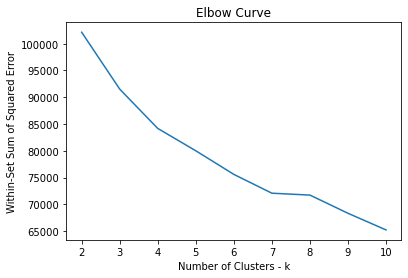

In [40]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(range_k,wssse_score)
plt.ylabel('Within-Set Sum of Squared Error')
plt.xlabel('Number of Clusters - k')
plt.title('Elbow Curve')
plt.show()

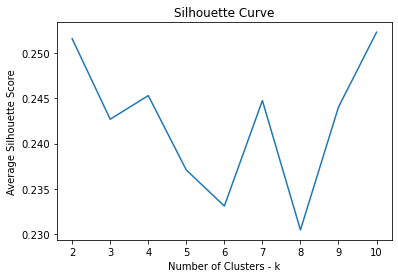

In [41]:
plt.plot(range_k,silhouette_score)
plt.ylabel('Average Silhouette Score')
plt.xlabel('Number of Clusters - k')
plt.title('Silhouette Curve')
plt.show()

### Step 6: Developing and Evaluating the model

In [42]:
kmeans = KMeans(featuresCol='scaled_features', k=4)

In [43]:
model = kmeans.fit(final_data)

In [44]:
preds = model.transform(final_data)

#### Counting the number of samples in each cluster

In [45]:
preds.groupBy('prediction').count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|         1|  765|
|         3| 1800|
|         2| 1011|
|         0| 1878|
+----------+-----+



#### Calculating wssse and silhouette score of the clusters

In [46]:
wssse = model.summary.trainingCost

In [47]:
print('within-set sum of squares: ', wssse)

within-set sum of squares:  84179.93365504907


In [48]:
preds= preds.withColumnRenamed('scaled_features', 'features')

In [49]:
silhouette = evaluator.evaluate(preds)

In [50]:
print('silhouette within euclidian distance: ', silhouette)

silhouette within euclidian distance:  0.24995000649737442


#### Calculating the centers of the cluster

In [51]:
centers = model.clusterCenters()

In [52]:
print('Centers of the clusters: ')
for center in centers:
    print(center)

Centers of the clusters: 
[1.76228045 1.84229094 2.58373386 3.01575113 3.24205912 2.87427182
 2.3937768  2.10986434 1.91417892 1.91620066 1.70612865 1.56026766
 1.42805407 1.01897355 0.82774044 0.96823586 0.75237116 0.52156094
 0.82267626 1.30657286 1.38813404 1.47808975]
[1.08154459 0.83427621 1.38865614 1.31489009 1.32884104 1.4163742
 2.1789121  1.82649324 2.08305497 2.13947024 2.21632158 2.93586337
 2.80510843 2.80822315 2.28383788 1.50288741 1.62293141 0.75369438
 0.78605228 0.53078186 0.60712444 0.76216942]
[2.88556872 1.94864617 2.12025491 1.9215183  1.64003741 1.51929016
 1.36051142 1.37692055 1.45715669 1.28956361 1.06822241 1.05516214
 0.9954397  1.06558597 1.16850969 1.34820514 1.45263192 2.01825687
 2.1474803  1.87785437 1.89559623 2.18487998]
[1.40988382 1.5738559  1.56880474 1.68913478 1.82826611 2.3839344
 2.99763593 3.17707992 3.28145155 2.9326786  2.27003235 1.5725378
 1.33781326 1.35481869 1.40524934 0.85791845 0.66382902 0.54052069
 0.75203503 0.67385056 0.75364995 0

### Step 7: Plotting the clusters

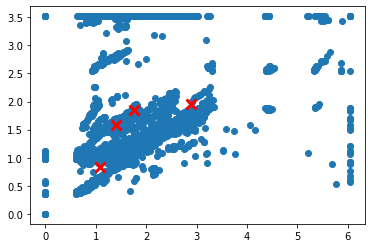

In [53]:
import matplotlib.pyplot as plt

# create a scatter plot of the data points
x = output.rdd.map(lambda row: row['scaled_features'][0]).collect()
y = output.rdd.map(lambda row: row['scaled_features'][1]).collect()
plt.scatter(x, y)

# plot the centroids of the clusters
centroids = model.clusterCenters()
centroid_x = [c[0] for c in centroids]
centroid_y = [c[1] for c in centroids]
plt.scatter(centroid_x, centroid_y, marker='x', s=100, linewidths=3, color='r')

plt.show()